<a href="https://colab.research.google.com/github/redimpulz/it-study/blob/master/ml/springstudy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Study1] 画像から顔を検出をしてモザイクをかけよう！

参考書籍: [すぐに使える! 業務で実践できる! PythonによるAI・機械学習・深層学習アプリのつくり方](http://www.socym.co.jp/book/1164) 

著:クジラ飛行机

[ソースコード(github)](https://github.com/kujirahand/book-mlearn-gyomu/tree/master/src/ch3/face)
著者が本に書いたソースコードがgithubにあがっています。そのリンクです。



## Step1.準備

In [0]:
# opencvのインポートとバージョン確認
%matplotlib inline
import cv2 #　opencvのインポート
import matplotlib.pyplot as plt # matplotlib(描画用)

print(cv2.__version__)

3.4.3


### Google Driveをマウント
- 下を実行すると、認証するためのリンクが表示されるのでクリック

- その後Googleアカウントを指定してアカウントアクセスのリクエストを承認すると、認証コードが表示されるのでコピー

- Enter your authorization code:にペーストしてEnterキーを押すとマウントできる。

- Mounted at /content/driveと表示されたら成功！

In [0]:
# Google driveをマウントする
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# ドライブの中にディレクトリを移動する
%cd /content/drive/My Drive

#作業用ディレクトリを作成する
!mkdir redimpulz_spring_study

# 作業用ディレクトリの中に移動する
%cd /content/drive/My Drive/redimpulz_spring_study

# 顔画像置き場のディレクトリを作成する
!mkdir face

# 画像置き場ディレクトリの中に移動する
%cd /content/drive/My Drive/redimpulz_spring_study/face

/content/drive/My Drive
mkdir: cannot create directory ‘redimpulz_spring_study’: File exists
/content/drive/My Drive/redimpulz_spring_study
/content/drive/My Drive/redimpulz_spring_study/face


## Step2. 画像のダウンロードと表示

[[[ 4 11 31]
  [ 7 14 34]
  [11 17 40]
  ...
  [13 28 47]
  [12 26 44]
  [12 26 44]]

 [[ 5 12 32]
  [ 7 14 34]
  [10 16 39]
  ...
  [16 31 50]
  [16 30 48]
  [15 29 47]]

 [[ 5 12 32]
  [ 6 13 33]
  [ 8 14 37]
  ...
  [21 36 55]
  [21 35 53]
  [21 35 53]]

 ...

 [[ 6  7  5]
  [ 2  5  3]
  [ 0  3  1]
  ...
  [19 31 67]
  [20 36 78]
  [15 34 77]]

 [[ 2  3  1]
  [ 3  6  4]
  [ 4  7  5]
  ...
  [27 39 73]
  [24 42 79]
  [19 40 78]]

 [[ 0  1  0]
  [ 3  6  4]
  [ 4  7  5]
  ...
  [27 41 70]
  [25 45 76]
  [21 44 76]]]


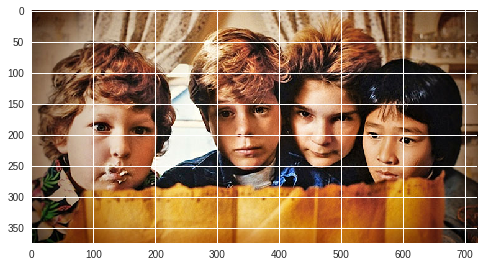

In [0]:
# 画像のダウンロード
import urllib.request as req
#url = "http://vis-www.cs.umass.edu/lfw/images/Gavin_Degraw/Gavin_Degraw_0001.jpg"
url = "http://cinema.usc.edu/userfiles/A0127948311B99D1C02CF7783648D35EBD92E9B2images/Goonies2(1).jpg"
req.urlretrieve(url, "test.png")

# OpenCVで読み込む
import cv2
img = cv2.imread("test.png")
print(img)

# ダウンロードした画像を画面に表示する
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Step3.OpenCVの顔検出カスケードファイルをダウンロードする

OpenCVが提供している顔検出用の識別器を使用します。[OpenCVのgithub](https://github.com/opencv/opencv/tree/master/data/haarcascades)

（笑顔、目、体全体を識別するもの等いっぱいあるみたいです）

### 下記のリンクから「ページを別名で保存」して正面顔検出用のxmlファイルをダウンロードする。

https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml

そのあと、Google Driveから 
> マイドライブ > redimpulz_spring_study > face 配下

にxmlをアップロードする。


## Step4.顔検出を行って赤く囲む

顔の座標= 406 123 132 132
顔の座標= 278 117 138 138
顔の座標= 61 130 162 162
顔の座標= 515 157 125 125


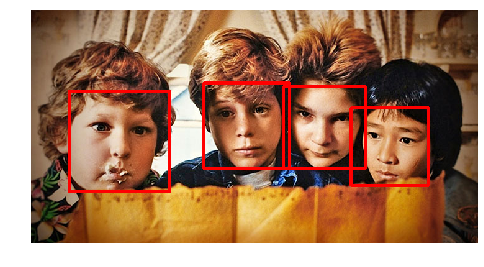

In [0]:
# カスケードファイルを指定して検出器を作成 --- (*1)
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 画像の読み込んでグレイスケールに変換する --- (*2)
img = cv2.imread("test.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 顔認識を実行 --- (*3)
# minSizeは、検出する区画の最低ピクセル数
face_list = cascade.detectMultiScale(img_gray, minSize=(30,30))
# 結果を確認 --- (*4)
if len(face_list) == 0:
    print("失敗")
    quit()
# 認識した部分に印をつける --- (*5)
for (x,y,w,h) in face_list:
    print("顔の座標=", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=3)

#画像を出力
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


## Step5. 顔を検出した部分にモザイクをかける

顔の座標= 406 123 132 132
顔の座標= 278 117 138 138
顔の座標= 61 130 162 162
顔の座標= 515 157 125 125


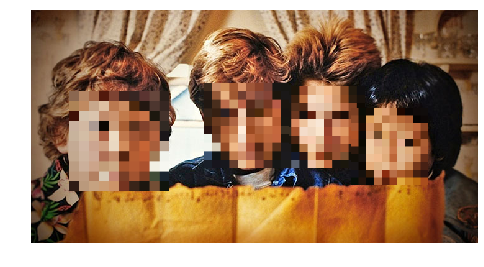

In [0]:
def mosaic(img, rect, size):
    # モザイクをかける領域を取得
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    # 一度縮小して拡大する
    i_small = cv2.resize(i_rect, ( size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    # 画像にモザイク画像を重ねる
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

# カスケードファイルを指定して検出器を作成 --- (*1)
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 画像の読み込んでグレイスケールに変換する --- (*2)
img = cv2.imread("test.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 顔認識を実行 --- (*3)
# minSizeは、検出する区画の最低ピクセル数
face_list = cascade.detectMultiScale(img_gray, minSize=(30,30))
# 結果を確認 --- (*4)
if len(face_list) == 0:
    print("失敗")
    quit()
# 認識した部分に印をつける --- (*5)
for (x,y,w,h) in face_list:
    print("顔の座標=", x, y, w, h)
    img = mosaic(img,(x,y,x+w,y+h),10)

#画像を出力
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()